***Pytorch Kullanarak Görüntü Sınıflandırma***

**'torch' genellikle PyTorch'un temel kütüphanesi iken, 'torchvision' görüntü işleme için kullanılan bir yardımcı kütüphanedir. Veri setlerini yüklemek ve dönüşümleri uygulamak için 'transforms' ve 'datasets' modülleri kullandım.**

In [ ]:
import torch
import torchvision
from torchvision import transforms,datasets

MNIST (el yazısı rakamlardan oluşuyor) veri setini indirip yüklemek için 'torchvision.datasets.MNIST' fonksiyonunu kullanıyorum.

transform=transforms.Compose([transforms.ToTensor()]) ise veri setindeki görüntüleri tensörlere dönüştürmeyi sağlar. transforms.Compose ile bir dizi dönüşüm işlemi oluşturulur ve burada sadece transforms.ToTensor() kullanılarak görüntüler tensörlere çevrilir.

In [ ]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 101372525.76it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 110223561.26it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28608208.64it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23577387.09it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



PyTorch'un 'torch.utils.data.DataLoader' modülünü kullanarak train ve test veri setlerini yüklenmiş olan train ve test veri setlerinden oluşturulmuş örnekleri alır ve bunları daha kolay bir şekilde işlemek için veri yükleyicilere dönüştürür.

batch_size her bir yükleme işleminde kullanılacak örnek sayısını belirtir.
shuffle=True, veri setinin her bir yükleme işlemi öncesinde karıştırılmasını sağlar. Bu, modelin öğrenme sürecini geliştirmek için kullanılıyor.

In [ ]:
traindata=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testdata=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

for döngüsü, traindata yükleyicisindeki her bir grup veriyi döngüdeki data değişkenine atar ve print ile bu grubu ekrana bastırır. Sadece ilk grubu bastırmak istediğim için break koydum. Bunu içeriği görmek ve kontrol etmek için yaptım.

In [ ]:
for data in traindata:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Burada, data adlı bir grup veri içinden x ve y adında örnek veri öğelerini seçip bu öğelerin içeriğini ve şeklini kontrol ediyoruz. '.shape' ile tensörün boyutunu göstermek istedim.

In [ ]:
x,y=data[0][0], data[1][0]
print(y)
print(data[0][0].shape)

tensor(5)
torch.Size([1, 28, 28])


Burada 'matplotlib.pyplot' kütüphanesini görüntüyü görselleştirmek için kullandım. 'imshow' fonksiyonu, bir görüntüyü ekrana çizmek için kullanılırken, 'plt.show()' ise çizilen görüntünün gösterilmesini sağlar. '.view(28, 28)' metodu, tensörün boyutunu piksel olarak şekillendiriyor.

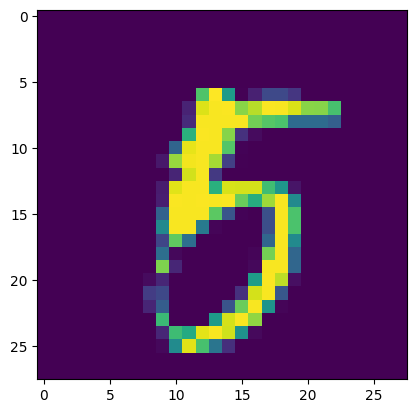

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))# 28 X 28 image
plt.show()

'torch.nn' modülü, neural network katmanlarını, aktivasyon fonksiyonlarını ve diğer neural network bileşenlerini içeren bir pakettir.
'torch.nn.functional' ise PyTorch'un işlevsel araçlarını içeren bir modüldür.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

Burada bir neural network modeli oluşturuyorum. '__init__' metodu içerisinde fully connected (nn.Linear) olacak şekilde fc1'den fc4'e kadar 4 katman oluşturuyorum. 'forward' methodu veriyi katmanlardan geçirip çıktı üreticektir. Aktivasyon fonksiyonu olarak ReLu kullanıyorum.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    # MNIST veri setindeki her bir resim 28x28 piksel boyutundadır ve bu katman, bu görüntüyü 784 boyutunda bir vektöre dönüştürür.
    self.fc1=nn.Linear(28*28,64) #  giriş boyutunu (28x28) piksel çıktı boyutunu (64)
    self.fc2=nn.Linear(64,64)
    self.fc3=nn.Linear(64,64)
    self.fc4=nn.Linear(64,10) #  son olarak 10 (MNIST veri setindeki sınıf sayısı) olarak belirle
    # MNIST veri setindeki rakamların 10 farklı sınıfı vardır
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.fc4(x)
    return F.log_softmax(x,dim=1) # en son katmanda çıktı olarak log-olasılık dağılımı elde edildi

    return x
# Model SUM
net=Net() # modeli oluştur
print(net)

# optimizer
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001) # Genellikle, 0.001 gibi orta düzey bir öğrenme oranı, birçok derin öğrenme modeli için iyi bir başlangıç noktası olabilir.
EPOCH= 5 # EPOCH sayısı, ne kadar süreyle modelin eğitileceğini belirtir.

for epoch in range(EPOCH):
  for data in traindata:
    X,y=data
    net.zero_grad() # model gradyanlarını sıfırla
    output=net(X.view(-1,28*28)) # Veriyi modele besle
    loss=F.nll_loss(output,y) # Hesaplanan çıktı ve gerçek etiket arasındaki kayıp
    loss.backward()
    optimizer.step() # Geriye doğru gradyanları hesaplar ve parametreleri günceller
  print("Loss:",loss) # Her epoch sonunda o anki kaybı ekrana yazdır

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: tensor(0.0058, grad_fn=<NllLossBackward0>)
Loss: tensor(0.0060, grad_fn=<NllLossBackward0>)
Loss: tensor(0.0006, grad_fn=<NllLossBackward0>)
Loss: tensor(0.0416, grad_fn=<NllLossBackward0>)
Loss: tensor(0.0014, grad_fn=<NllLossBackward0>)


Burada train üzerinde eğitilen sinir ağı modelinin doğruluğunu hesaplamak için bir test işlemi gerçekleştiriyorum.

In [ ]:
correct=0 # doğru tahmin edilen örneklerin sayısı
total=0 # toplam tahmin edilen örneklerin sayısı
with torch.no_grad(): # gradyan hesaplarının devre dışı bırakılması
  for data in traindata: # her bir grup verisi için:
    X,y=data
    output=net(X.view(-1,784)) # veriyi modele besle ve çıktı al
    for idx,i in enumerate(output):
      if(torch.argmax(i)==y[idx]): # gerçek etiketle karşılaştır
        correct+=1
      total+=1
print("Accuracy: ",round(correct/total,3)) # Doğru tahmin edilen örnek sayısı toplam örnek sayısına bölünerek hesaplanır

Accuracy:  0.985


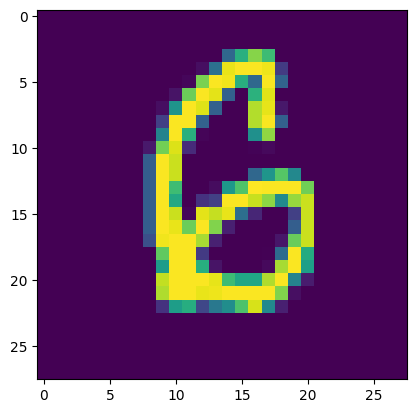

In [ ]:
plt.imshow(X[0].view(28,28)) # tensör formatındaki bir görüntüyü matplotlib kütüphanesini kullanarak görselleştirmek
plt.show()

'X[0]' ile veri setinden ilk örneği seçiyoruz.
'.view(-1,784)' ile bu seçilen örneği 28x28 boyutundan tek bir satırda 784 öğe içeren bir tensöre dönüştürüyoruz.
'net(X[0].view(-1,784))' ile modelimize bu dönüştürülmüş veriyi veriyoruz ve çıktıyı elde ediyoruz.
'torch.argmax()' fonksiyonu, çıktı tensöründeki en büyük değerin indeksini döndürür. Bu indeks, sınıf tahminini temsil eder.

In [ ]:
print(torch.argmax(net(X[0].view(-1,784))))

tensor(6)


***SONUÇ:***

**MNIST veri seti, train ve test olarak iki ayrı veri setine ayrılıyor. Bu veri setleri, tensörlere dönüştürülerek ve belirli bir boyutta yeniden şekillendirilerek işleniyor.Tam bağlantılı katmanlar içeren bir sinir ağı modeli tasarlanıyor. Model, veri yükleyicileri ve optimizasyon algoritmaları kullanılarak eğitiliyor ve her bir epoch (eğitim dönemi) sonunda eğitim kaybı (loss) hesaplanıyor.Eğitilen model test ediliyor ve doğruluk oranı hesaplanıyor. İlgili bir görüntü, modelin sınıf tahminini görmek için kullanılıyor. Model, verilen bir görüntünün hangi sınıfa ait olduğunu tahmin ediyor.**